In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## Loading the data

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Checking Null values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing null values with mean

In [7]:
df = df.fillna(df.mean())

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_7652\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

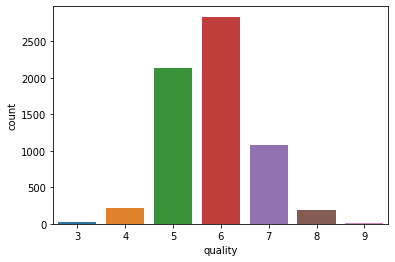

In [9]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='quality', data=df)

## Checking duplicated values

In [10]:
df.duplicated().sum()

1168

### Dropping the duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5329, 13)

<AxesSubplot:>

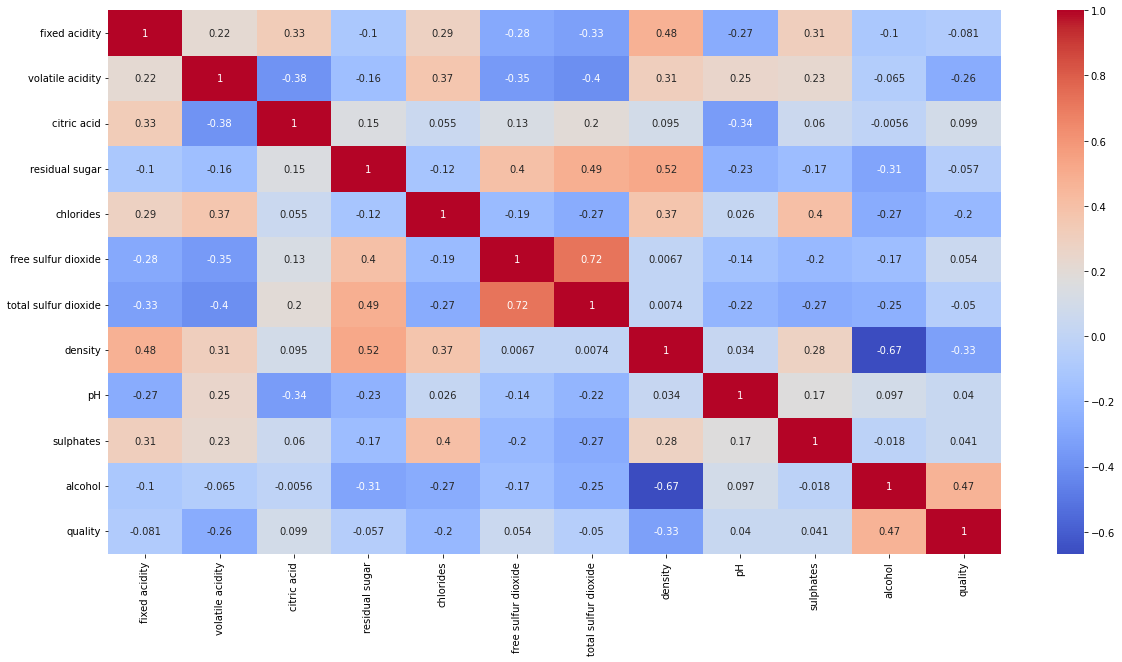

In [13]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [14]:
df.duplicated().sum()

0

## Checking Outliers

In [15]:
# import warnings

# # outlier check
# plt.figure(figsize=(15, 20))

# for i, c in enumerate(df.drop('quality', axis=1).select_dtypes(include='number').columns):
#     plt.subplot(10,2,i*2+1)
#     sns.boxplot(df[c], color='blue')
#     plt.title('Distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
#     plt.subplot(10,2,i*2+2)
#     sns.boxplot(df[c].apply('log1p'), color='red')
#     plt.title('Log1p distribution plot for field:' + c)
#     plt.xlabel('')
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## Treating cat variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.type.head()

0    1
1    1
2    1
3    1
6    1
Name: type, dtype: int32

In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


## Data splitting

In [20]:
target = 'quality'
y = df[target]
X = df.drop(target,axis=1)

In [21]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


## Data Balancing using SMOTE

In [22]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X,y)

In [24]:
X_resampled.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [25]:
df['quality'] = df['quality'].apply({3:0,4:1,5:2,6:3,7:4,8:5,9:6}.get)

In [26]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [27]:
y_resampled.value_counts()

6    2327
5    2327
7    2327
8    2327
4    2327
3    2327
9    2327
Name: quality, dtype: int64

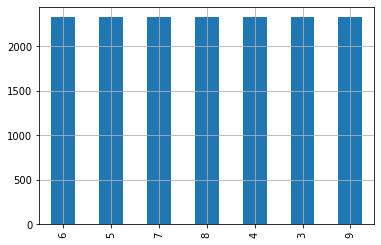

In [28]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


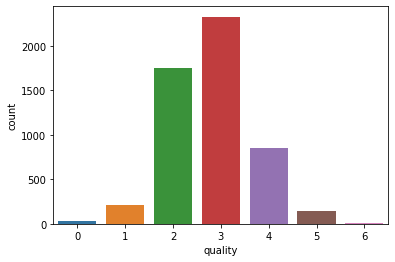

In [29]:
sns.countplot(df['quality'])
plt.show()

## Train test split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.05,random_state=123)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
#checking the mean value after scaling
scaler.mean_

array([7.64831330e-01, 7.28161746e+00, 3.70271080e-01, 3.20261166e-01,
       4.69144771e+00, 5.29196214e-02, 3.02134494e+01, 1.12106338e+02,
       9.93865016e-01, 3.24687332e+00, 5.14985460e-01, 1.09386742e+01])

In [33]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
9475,1,9.840636,0.463185,0.834790,5.689934,0.049116,19.652228,124.463696,0.996545,3.027096,0.518115,9.981147
15795,1,7.536265,0.333971,0.371813,6.050952,0.022917,48.612872,120.446057,0.991882,3.256863,0.388921,12.034814
4319,0,7.700000,0.260000,0.300000,1.700000,0.059000,20.000000,38.000000,0.994900,3.290000,0.470000,10.800000
12399,1,5.864667,0.310267,0.257533,4.508000,0.029513,35.460000,100.513333,0.990859,3.330800,0.483200,12.159333
7137,1,5.940033,0.236499,0.408492,2.519766,0.036702,11.651585,109.700167,0.991405,3.473987,0.430000,11.454942
...,...,...,...,...,...,...,...,...,...,...,...,...
12252,1,5.431674,0.283713,0.284852,5.034163,0.033713,61.940674,138.514832,0.989737,3.182278,0.360593,12.425742
1346,1,9.300000,0.310000,0.490000,1.300000,0.042000,34.000000,147.000000,0.994800,3.110000,0.460000,9.800000
11646,1,6.537867,0.424603,0.283515,4.798640,0.034649,29.324265,134.000000,0.991254,3.260816,0.447029,12.156910
15725,1,6.769087,0.326183,0.357635,1.802904,0.024720,26.367218,94.468871,0.989870,3.396473,0.545747,12.569087


In [34]:
X_test

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2001,1,8.000000,0.360000,0.390000,1.600000,0.024000,26.000000,93.000000,0.991160,3.150000,0.490000,11.900000
174,1,6.900000,0.540000,0.320000,13.200000,0.050000,53.000000,236.000000,0.997300,3.200000,0.500000,9.600000
9225,1,7.937693,0.253677,0.363146,9.107778,0.053813,23.124613,159.124613,0.997741,3.322492,0.478100,9.849845
12694,1,5.735459,0.252072,0.289362,1.985654,0.031809,16.936240,70.968120,0.989624,3.305459,0.374183,12.222707
11613,1,6.387059,0.372588,0.255333,1.837647,0.024871,6.454901,57.870586,0.989388,3.083647,0.708941,12.937647
...,...,...,...,...,...,...,...,...,...,...,...,...
11753,0,9.341709,0.404909,0.468161,4.530051,0.094816,3.000000,10.000000,0.996328,3.263005,0.634171,12.188342
1533,1,7.500000,0.330000,0.390000,12.400000,0.065000,29.000000,119.000000,0.997400,3.160000,0.390000,9.400000
10221,1,7.592529,0.319502,0.583984,16.669069,0.049726,43.074706,163.049804,0.999858,3.146763,0.536514,9.187549
12830,1,6.358294,0.300314,0.489597,6.065461,0.034803,36.322867,113.677133,0.991058,3.199911,0.528969,12.300000


In [35]:
X_train_scaled

array([[ 0.55450683,  2.12594057,  0.47498519, ..., -1.47354046,
         0.02402114, -0.76184322],
       [ 0.55450683,  0.21155198, -0.18557012, ...,  0.06697834,
        -0.96772029,  0.87212824],
       [-1.80340431,  0.34757722, -0.56371795, ...,  0.28915095,
        -0.34532642, -0.11033416],
       ...,
       [ 0.55450683, -0.61788091,  0.27775009, ...,  0.09348219,
        -0.52165802,  0.96927252],
       [ 0.55450683, -0.42579194, -0.22538517, ...,  1.00301945,
         0.23613749,  1.29721508],
       [ 0.55450683, -0.56626335,  0.04973531, ..., -1.387021  ,
        -1.11296649,  1.24224699]])

In [36]:
# converting the Scaled data to dataframe because it will give np arrays as output
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

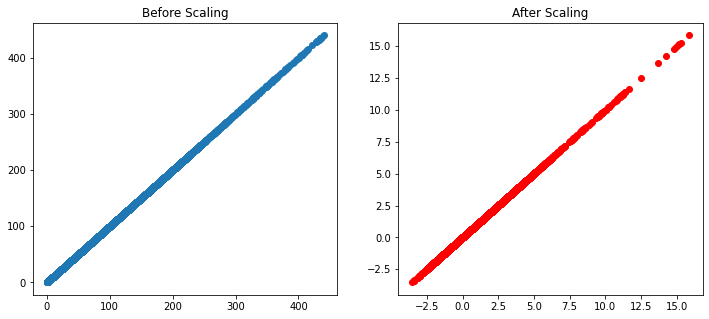

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train, X_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled, X_train_scaled,color='red')
ax2.set_title("After Scaling")
plt.show()


# below we can observe that the origin has changed after scaling 

# LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [39]:
X_train.shape

(15474, 12)

In [40]:
lda = LDA(n_components=6)
x_train_LDA = lda.fit_transform(X_train,y_train)
x_test_LDA = lda.transform(X_test)

Text(0, 0.5, 'comulative explained variance')

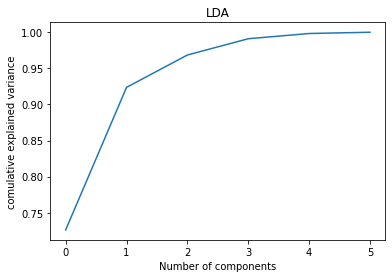

In [41]:
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.title("LDA")
plt.xlabel('Number of components')
plt.ylabel('comulative explained variance')

In [42]:
np.cumsum(lda.explained_variance_ratio_)

array([0.72623413, 0.9236767 , 0.96849446, 0.99101049, 0.99826155,
       1.        ])

## Model Building

 # Model on original data

In [43]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

# Extra tree

In [44]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [45]:
y_train_ = etc.predict(X_train)
y_test_  = etc.predict(X_test)

In [46]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9857    1.0000    0.9928       138
           4     0.9385    0.9531    0.9457       128
           5     0.7477    0.6803    0.7124       122
           6     0.6392    0.5536    0.5933       112
           7     0.7419    0.9020    0.8142       102
           8     0.9810    0.9810    0.9810       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8687       815
   macro avg     0.8620    0.8671    0.8628       815
weighted avg     0.8658    0.8687    0.8656       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

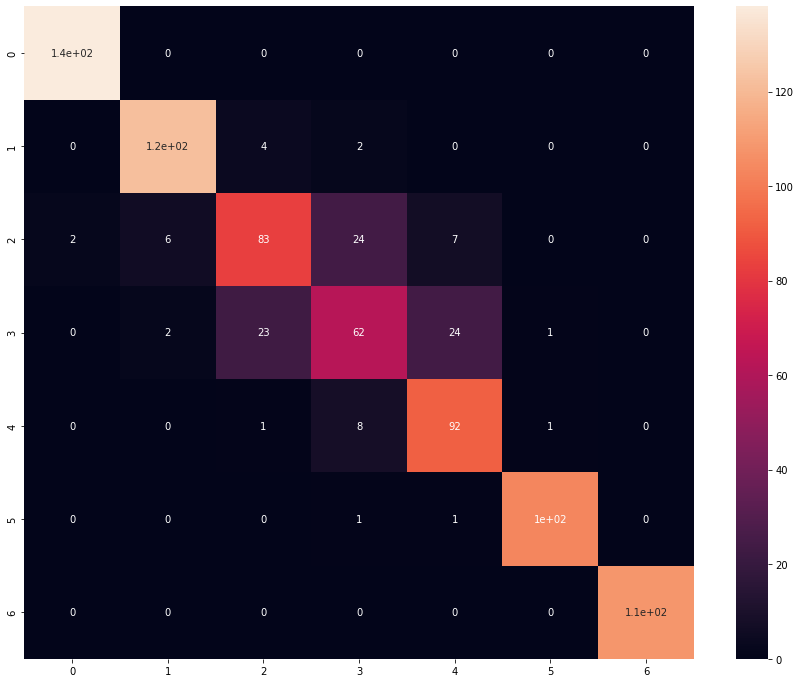

In [47]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_)
sns.heatmap(cr,annot=True)


# Boruta selected data (new data)

In [48]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc1 = ExtraTreesClassifier()
etc1.fit(x_train_LDA, y_train)


ExtraTreesClassifier()

In [49]:
FS_pred  = etc1.predict(x_test_LDA)

In [50]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, FS_pred,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9855    0.9855    0.9855       138
           4     0.8346    0.8672    0.8506       128
           5     0.6810    0.6475    0.6639       122
           6     0.5532    0.4643    0.5049       112
           7     0.6525    0.7549    0.7000       102
           8     0.8796    0.9048    0.8920       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.8074       815
   macro avg     0.7981    0.8035    0.7995       815
weighted avg     0.8034    0.8074    0.8043       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

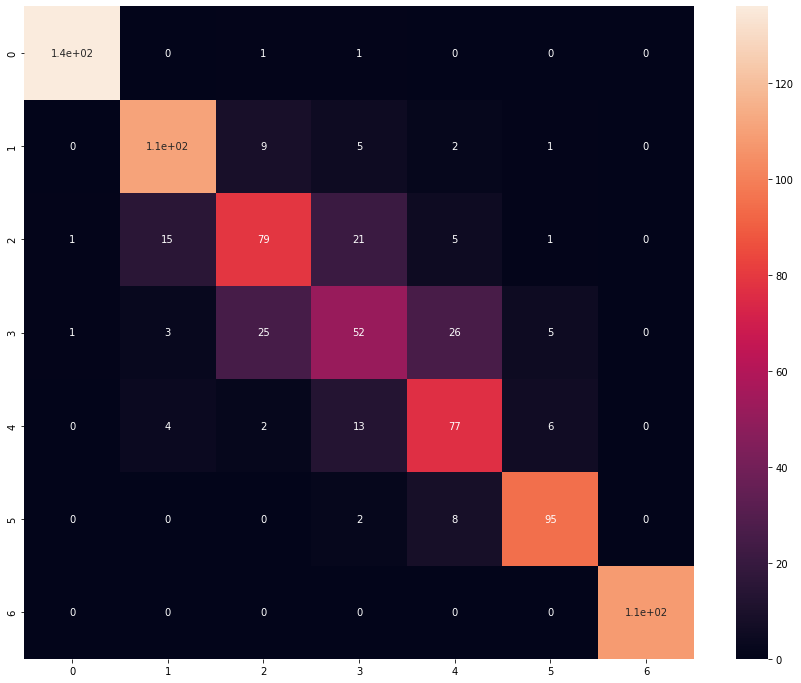

In [51]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, FS_pred)
sns.heatmap(cr,annot=True)


# DTC

In [52]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
DT = DTR.predict(X_test)

In [54]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9632    0.9493    0.9562       138
           4     0.8154    0.8281    0.8217       128
           5     0.5645    0.5738    0.5691       122
           6     0.4211    0.3571    0.3865       112
           7     0.5660    0.5882    0.5769       102
           8     0.8017    0.8857    0.8416       105
           9     1.0000    1.0000    1.0000       108

    accuracy                         0.7460       815
   macro avg     0.7331    0.7403    0.7360       815
weighted avg     0.7402    0.7460    0.7424       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

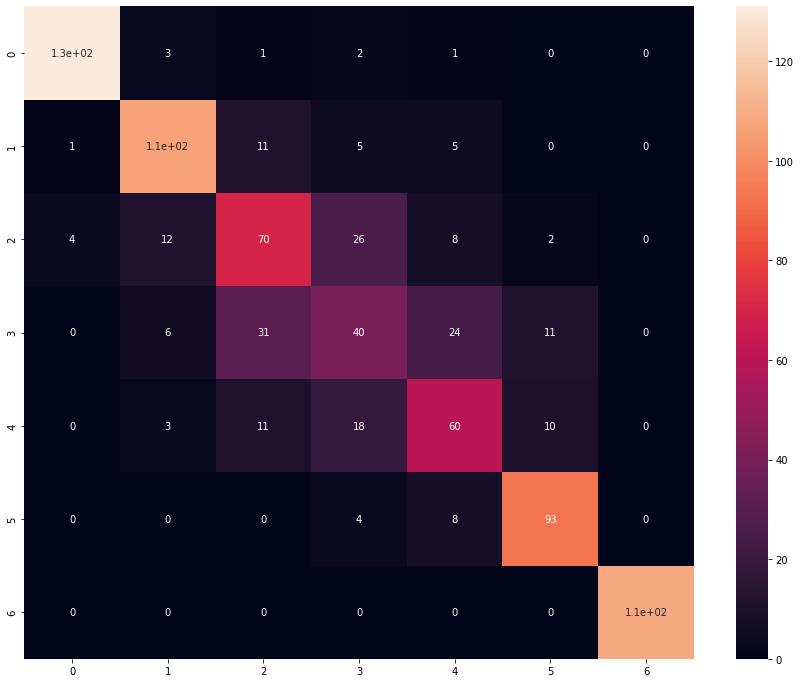

In [55]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT)
sns.heatmap(cr,annot=True)

# New data

In [56]:
from sklearn.tree import DecisionTreeClassifier
DTR1 = DecisionTreeClassifier()
DTR1.fit(x_train_LDA, y_train)

DecisionTreeClassifier()

In [57]:
DT1 = DTR1.predict(x_test_LDA)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT1,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9021    0.9348    0.9181       138
           4     0.7398    0.7109    0.7251       128
           5     0.4182    0.3770    0.3966       122
           6     0.3204    0.2946    0.3070       112
           7     0.5470    0.6275    0.5845       102
           8     0.7545    0.7905    0.7721       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.6798       815
   macro avg     0.6676    0.6765    0.6712       815
weighted avg     0.6725    0.6798    0.6754       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

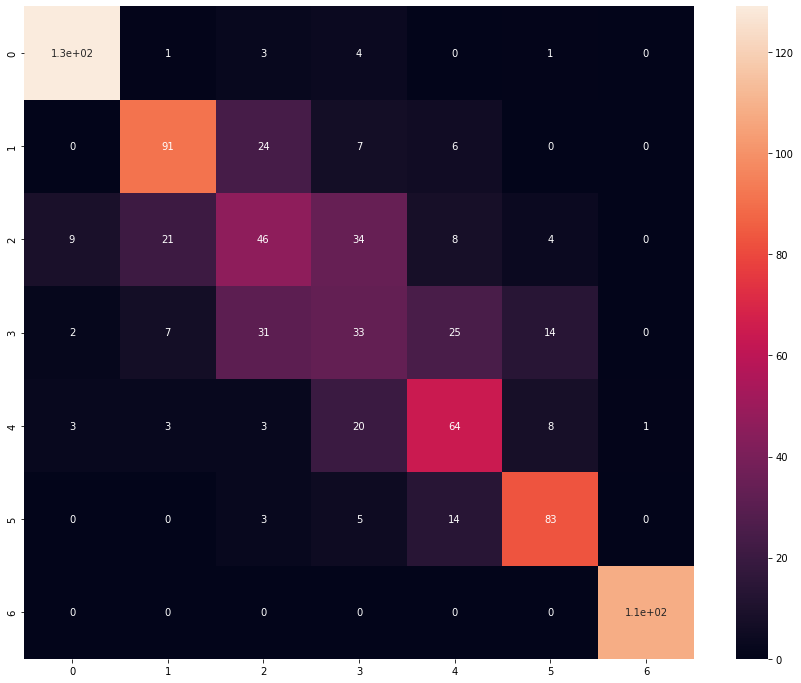

In [58]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT1)
sns.heatmap(cr,annot=True)

# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

In [60]:
#GB1 = GB.predict(X_train)
GB_test = GB.predict(X_test)

In [61]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8897    0.9348    0.9117       138
           4     0.7578    0.7578    0.7578       128
           5     0.5929    0.5492    0.5702       122
           6     0.4894    0.4107    0.4466       112
           7     0.5455    0.5882    0.5660       102
           8     0.7500    0.8286    0.7873       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.7288       815
   macro avg     0.7166    0.7242    0.7193       815
weighted avg     0.7219    0.7288    0.7243       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

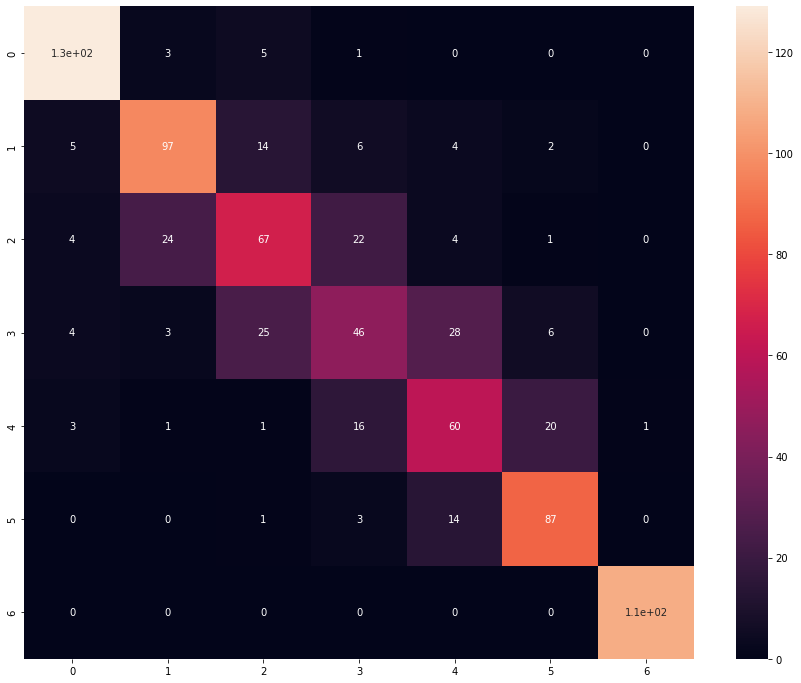

In [62]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test)
sns.heatmap(cr,annot=True)

# new data

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB1 = GradientBoostingClassifier()
GB1.fit(x_train_LDA, y_train)


GradientBoostingClassifier()

In [64]:
GB_test1 = GB1.predict(x_test_LDA)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test1,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8188    0.8188    0.8188       138
           4     0.6565    0.6719    0.6641       128
           5     0.5182    0.4672    0.4914       122
           6     0.3146    0.2500    0.2786       112
           7     0.4104    0.5392    0.4661       102
           8     0.6990    0.6857    0.6923       105
           9     0.9818    1.0000    0.9908       108

    accuracy                         0.6368       815
   macro avg     0.6285    0.6333    0.6289       815
weighted avg     0.6341    0.6368    0.6336       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

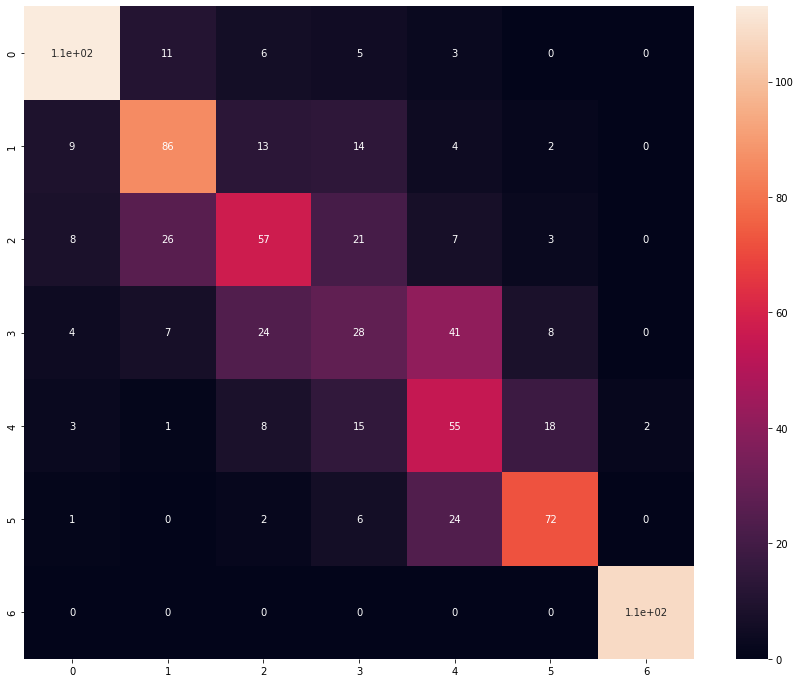

In [65]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test1)
sns.heatmap(cr,annot=True)

# Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pred = LR.predict(X_test)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
print(classification_report(y_test,LR_pred,digits=4))

              precision    recall  f1-score   support

           3     0.3625    0.4203    0.3893       138
           4     0.3735    0.4844    0.4218       128
           5     0.3187    0.2377    0.2723       122
           6     0.1905    0.0714    0.1039       112
           7     0.1579    0.0588    0.0857       102
           8     0.3542    0.4857    0.4096       105
           9     0.3736    0.6019    0.4610       108

    accuracy                         0.3423       815
   macro avg     0.3044    0.3372    0.3062       815
weighted avg     0.3088    0.3423    0.3118       815



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

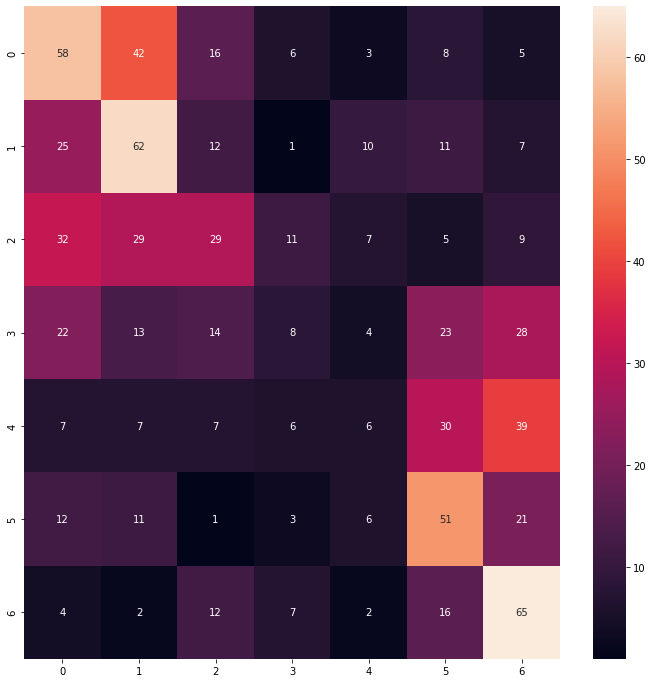

In [68]:
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_pred)
sns.heatmap(cr,annot=True)

# New data

In [69]:
LR1 = LogisticRegression()
LR1.fit(x_train_LDA,y_train)
LR_test1 = LR1.predict(x_test_LDA)

              precision    recall  f1-score   support

           3     0.5385    0.5072    0.5224       138
           4     0.5194    0.5234    0.5214       128
           5     0.4091    0.3689    0.3879       122
           6     0.2593    0.2500    0.2545       112
           7     0.3656    0.3333    0.3487       102
           8     0.5088    0.5524    0.5297       105
           9     0.8244    1.0000    0.9038       108

    accuracy                         0.5031       815
   macro avg     0.4893    0.5050    0.4955       815
weighted avg     0.4902    0.5031    0.4950       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

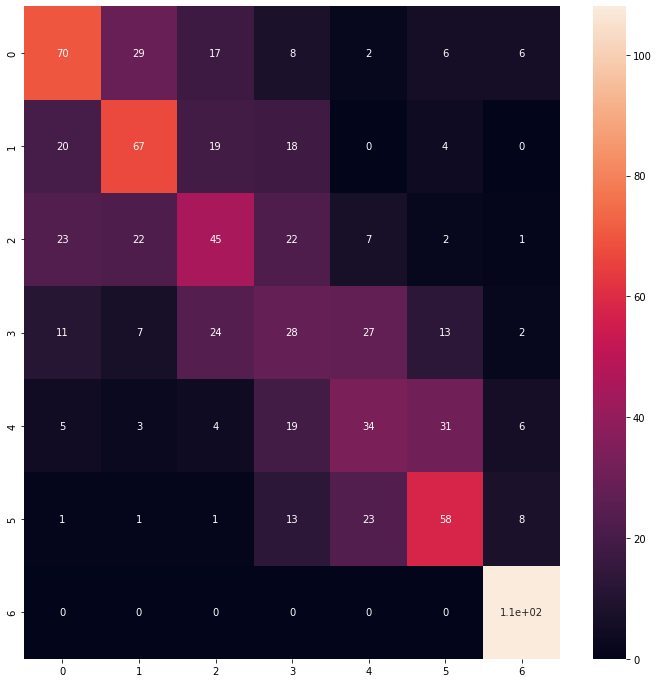

In [70]:
print(classification_report(y_test,LR_test1,digits=4))

# Confusion matrix
plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test1)
sns.heatmap(cr,annot=True)

# SVC

In [71]:
from sklearn.svm import SVC
svm = SVC(random_state=123)
svm.fit(X_train, y_train)

SVC(random_state=123)

In [72]:
svm_pred  = svm.predict(X_test)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4296    0.4203    0.4249       138
           4     0.4222    0.4453    0.4335       128
           5     0.2789    0.3361    0.3048       122
           6     0.2105    0.0714    0.1067       112
           7     0.3636    0.0392    0.0708       102
           8     0.3088    0.2000    0.2428       105
           9     0.3523    0.9167    0.5090       108

    accuracy                         0.3534       815
   macro avg     0.3380    0.3470    0.2989       815
weighted avg     0.3417    0.3534    0.3079       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

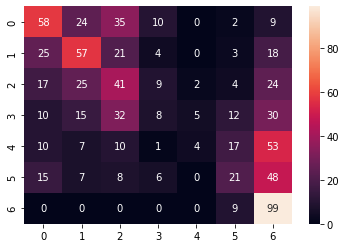

In [73]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, svm_pred,digits=4))



print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, svm_pred)
sns.heatmap(cr,annot=True)

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8540    0.8478    0.8509       138
           4     0.6277    0.6719    0.6491       128
           5     0.5714    0.4918    0.5286       122
           6     0.3542    0.3036    0.3269       112
           7     0.3719    0.4412    0.4036       102
           8     0.6415    0.6476    0.6445       105
           9     0.9558    1.0000    0.9774       108

    accuracy                         0.6356       815
   macro avg     0.6252    0.6291    0.6259       815
weighted avg     0.6333    0.6356    0.6331       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

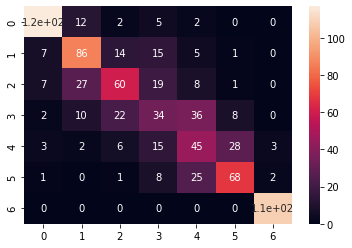

In [74]:
from sklearn.svm import SVC
svm1 = SVC(random_state=123)
svm1.fit(x_train_LDA, y_train)

svm_pred1  = svm1.predict(x_test_LDA)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, svm_pred1,digits=4))



print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, svm_pred1)
sns.heatmap(cr,annot=True)


# Random Forest

RandomForestClassifier(n_jobs=-1, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9783    0.9783    0.9783       138
           4     0.8462    0.8594    0.8527       128
           5     0.6723    0.6557    0.6639       122
           6     0.5109    0.4196    0.4608       112
           7     0.6218    0.7255    0.6697       102
           8     0.8692    0.8857    0.8774       105
           9     0.9818    1.0000    0.9908       108

    accuracy                         0.7939       815
   macro avg     0.7829    0.7892    0.7848       815
weighted avg     0.7893    0.7939    0.7904       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

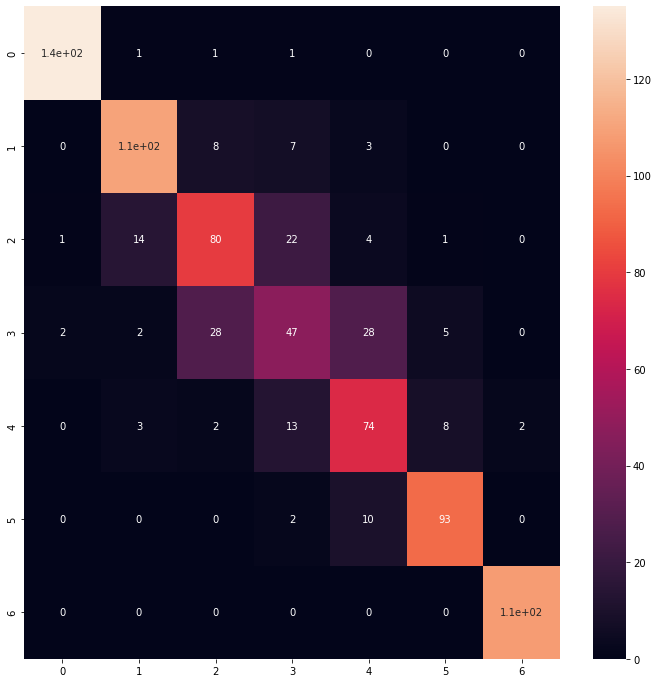

In [75]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(x_train_LDA, y_train)

RFC_pred = rfc.predict(x_test_LDA)

print(rfc)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_pred,digits=4))

plt.figure(figsize=(12, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_pred)
sns.heatmap(cr,annot=True)


# KNN

KNeighborsClassifier()
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.8790    1.0000    0.9356       138
           4     0.7438    0.9297    0.8264       128
           5     0.5825    0.4918    0.5333       122
           6     0.5738    0.3125    0.4046       112
           7     0.6827    0.6961    0.6893       102
           8     0.8017    0.9238    0.8584       105
           9     0.9908    1.0000    0.9954       108

    accuracy                         0.7706       815
   macro avg     0.7506    0.7648    0.7490       815
weighted avg     0.7517    0.7706    0.7524       815

Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

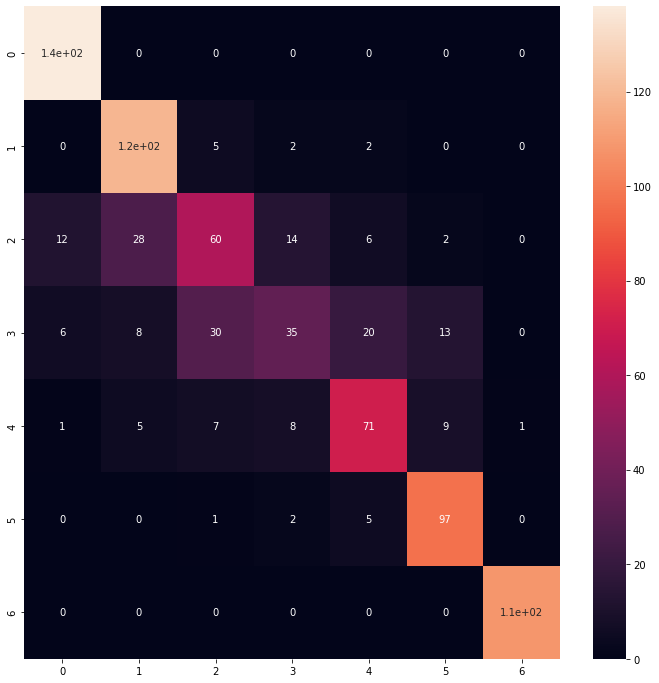

In [76]:
from sklearn.neighbors import KNeighborsClassifier
# K-Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train_LDA, y_train)
KNN_pred  = knn.predict(x_test_LDA)
print(knn)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, KNN_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, KNN_pred)
sns.heatmap(cr,annot=True)


# ABC

AdaBoostClassifier(learning_rate=0.01, n_estimators=200, random_state=123)
Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4393    0.6812    0.5341       138
           4     0.0000    0.0000    0.0000       128
           5     0.0000    0.0000    0.0000       122
           6     0.2036    0.5000    0.2894       112
           7     0.3030    0.1961    0.2381       102
           8     0.4444    0.5333    0.4848       105
           9     0.8060    1.0000    0.8926       108

    accuracy                         0.4098       815
   macro avg     0.3138    0.4158    0.3484       815
weighted avg     0.3043    0.4098    0.3407       815

Confusion matrix
-------------------------------------------------------


C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<AxesSubplot:>

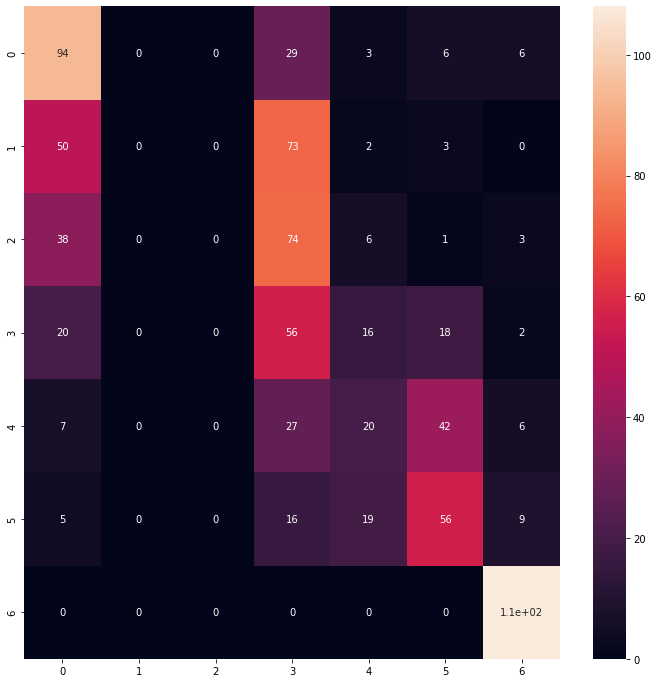

In [77]:
from sklearn.ensemble import AdaBoostClassifier
# K-Neighbors
ABC = AdaBoostClassifier(n_estimators=200,random_state=123,learning_rate=0.01)
ABC.fit(x_train_LDA, y_train)
ABC_pred  = ABC.predict(x_test_LDA)
print(ABC)
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, ABC_pred,digits=4))

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, ABC_pred)
sns.heatmap(cr,annot=True)


# XGB on new data

In [78]:
from xgboost import XGBClassifier

xgc = XGBClassifier(random_state=123)
xgc.fit(x_train_LDA, y_train)

XGB_pred3  = xgc.predict(x_test_LDA)

print(xgc)

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, XGB_pred3,digits=4))

# print('Roc_auc score')
# print('-------------------------------------------------------')
# print(roc_auc_score(y_test, XGB_pred))
# print('')

plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, XGB_pred3)
sns.heatmap(cr,annot=True)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [3 4 5 6 7 8 9]

# Voting

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score, accuracy_score,precision_score,recall_score

# Hard

In [86]:
# Voting Classifier
voting1 = VotingClassifier(estimators=[
          ('DTC',DTR),
          ('ETC', etc),
          ('GB',GB)],
           voting='hard')

In [87]:
# list of classifiers
list_of_classifiers = [DTR,etc,voting1,GB]
# Loop scores
for classifier in list_of_classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("F1 Score:")
    print(classifier.__class__.__name__, precision_score(y_test, pred,average='micro'))
    print("Accuracy:")
    print(classifier.__class__.__name__, recall_score(y_test, pred,average='micro'))
    print("----------")

F1 Score:
DecisionTreeClassifier 0.7496932515337423
Accuracy:
DecisionTreeClassifier 0.7496932515337423
----------
F1 Score:
ExtraTreesClassifier 0.8711656441717791
Accuracy:
ExtraTreesClassifier 0.8711656441717791
----------
F1 Score:
VotingClassifier 0.8331288343558282
Accuracy:
VotingClassifier 0.8331288343558282
----------
F1 Score:
GradientBoostingClassifier 0.7276073619631902
Accuracy:
GradientBoostingClassifier 0.7276073619631902
----------


# Stacking

In [89]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=123)),
    ('ETC', ExtraTreesClassifier(n_estimators=120,random_state=123)),
    ('gbdt',GradientBoostingClassifier())
]

In [90]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=DecisionTreeClassifier(),
    cv=10
)

In [91]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=123)),
                               ('ETC',
                                ExtraTreesClassifier(n_estimators=120,
                                                     random_state=123)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=DecisionTreeClassifier())

In [93]:
y_pred1 = clf.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.838036809815951